In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
from mpl_toolkits.axes_grid1 import ImageGrid
import warnings

warnings.filterwarnings("ignore")

In [2]:
digits = load_digits()
df = pd.DataFrame(data=digits.data)
df['target'] = digits.target
X = df.drop('target',axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

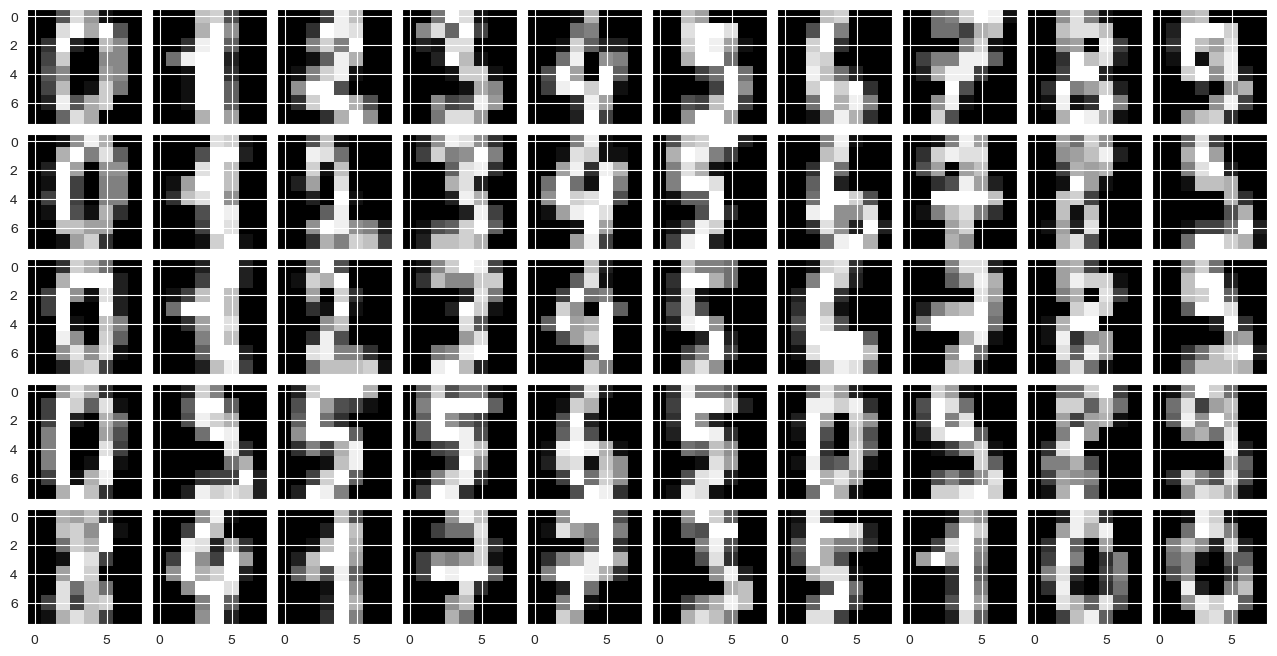

In [3]:
fig = plt.figure(figsize=(16, 8))
grid = ImageGrid(fig, 111,nrows_ncols=(5,10),axes_pad=0.1 )
plt.gray()
for ax, im in zip(grid, digits.images[:50]):
    ax.imshow(im)
    plt.xlabel([])
    plt.ylabel([])
    plt.xticks([])
    plt.yticks([])

plt.show()

# Random forest

In [4]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=30, max_features=10, oob_score=True)
model.fit(X, y)
model.oob_score_

0.9577072899276572

In [5]:
ntrees_list = np.arange(5,100,2)
scores = np.empty(len(ntrees_list))

for j, ntrees in enumerate(ntrees_list):
    m = RandomForestClassifier(n_estimators=ntrees, max_features=30,oob_score=True)
    m.fit(X, y)
    scores[j] = m.oob_score_

Text(0, 0.5, 'oob score')

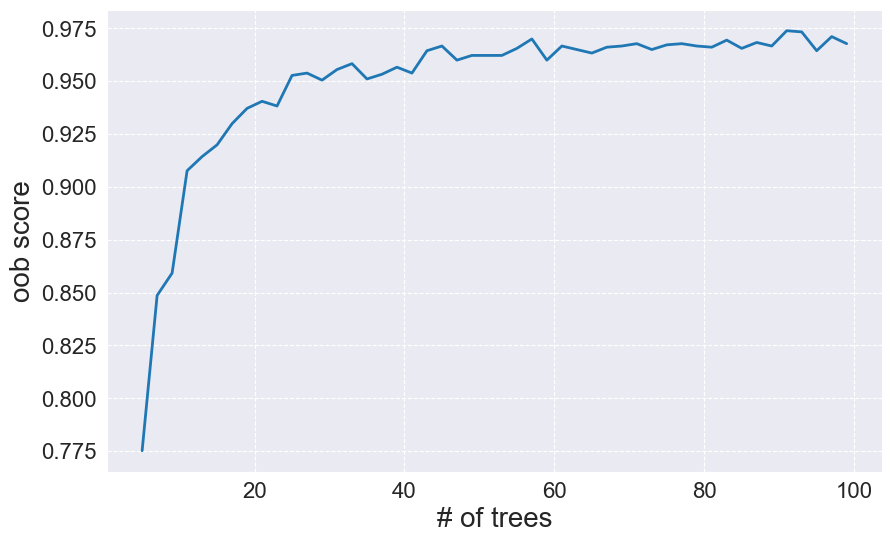

In [6]:
plt.figure(figsize=(10,6))
plt.plot(ntrees_list, scores,linewidth=2)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('# of trees',fontsize=20)
plt.ylabel('oob score',fontsize=20)

## Feature importance

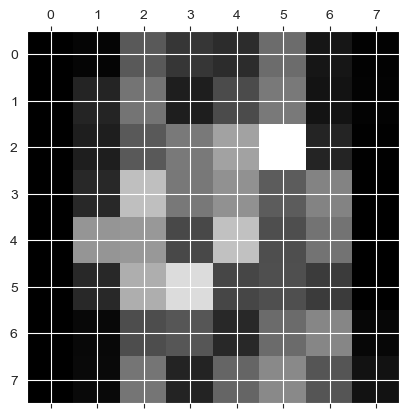

In [7]:
plt.matshow(np.reshape(model.feature_importances_,(8,8)))

## Variation over number of trees and number of features

In [8]:
ntrees_list = np.arange(1,80,1)
nfeatures_list = [5,30,64]
scores = np.empty((len(nfeatures_list),len(ntrees_list)))

for i, nfeatures in enumerate(nfeatures_list):
    for j, ntrees in enumerate(ntrees_list):
        m = RandomForestClassifier(n_estimators=ntrees, max_features=nfeatures,oob_score=True)
        m.fit(X, y)
        scores[i, j] = m.oob_score_
        

Text(0, 0.5, '% improvement')

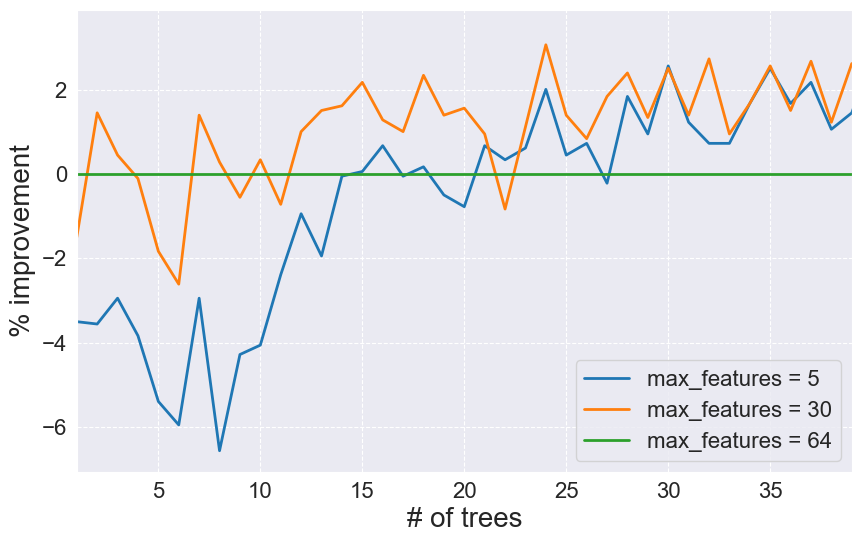

In [9]:
dscores = scores - scores[2,:]

plt.figure(figsize=(10,6))
for i, nfeatures in enumerate(nfeatures_list):
    plt.plot(ntrees_list, 100*dscores[i,:],linewidth=2,label='max_features = %d' % (nfeatures))
plt.legend(fontsize=16)
plt.xlim(1,39)
plt.grid(linestyle='--')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('# of trees',fontsize=20)
plt.ylabel('% improvement',fontsize=20)

In [10]:
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(X_test)
cm = confusion_matrix(y_test, y_predicted)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 42,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 40,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 36]], dtype=int64)

In [11]:
# import seaborn as sn

# plt.figure(figsize=(10,7))
# sn.heatmap(cm, annot=True)
# plt.xlabel('Predicted')
# plt.ylabel('Truth')